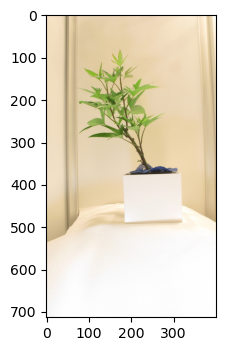

In [1]:
# Import Libraries 
from plantcv import plantcv as pcv
import matplotlib

class options:
    def __init__(self):
        self.image = "/Users/garethtate/plantcv/image.jpg"
        self.debug = "plot"
        self.writeimg= False
        self.result = "./vis_tutorial_results"
        self.outdir = "." # Store the output to the current directory
        
# Get options
args = options()

# Set debug to the global parameter 
pcv.params.debug = args.debug

# Read image

# Inputs:
#   filename - Image file to be read in 
#   mode - How to read in the image; either 'native' (default), 'rgb', 'gray', or 'csv'
img, path, filename = pcv.readimage(filename=args.image)

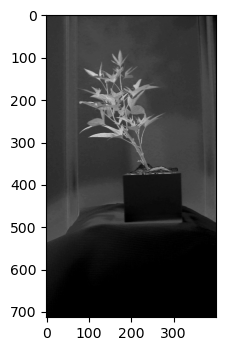

In [2]:
# Convert RGB to HSV and extract the saturation channel

# Inputs:
#   rgb_image - RGB image data 
#   channel - Split by 'h' (hue), 's' (saturation), or 'v' (value) channel
s = pcv.rgb2gray_hsv(rgb_img=img, channel='s')

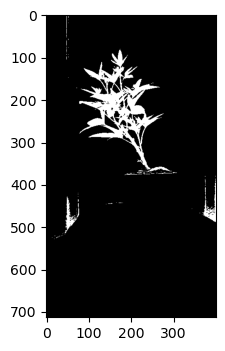

In [3]:
# Take a binary threshold to separate plant from background. 
# Threshold can be on either light or dark objects in the image. 

# Inputs:
#   gray_img - Grayscale image data 
#   threshold- Threshold value (between 0-255)
#   max_value - Value to apply above threshold (255 = white) 
#   object_type - 'light' (default) or 'dark'. If the object is lighter than 
#                 the background then standard threshold is done. If the object 
#                 is darker than the background then inverse thresholding is done. 
s_thresh = pcv.threshold.binary(gray_img=s, threshold=85, max_value=255, object_type='light')

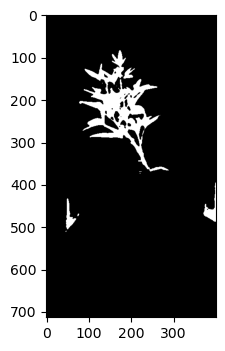

In [4]:
# Median Blur to clean noise 

# Inputs: 
#   gray_img - Grayscale image data 
#   ksize - Kernel size (integer or tuple), (ksize, ksize) box if integer input,
#           (n, m) box if tuple input 
s_mblur = pcv.median_blur(gray_img=s_thresh, ksize=5)

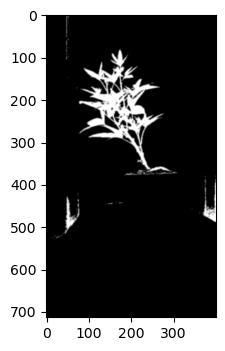

In [24]:
# An alternative to using median_blur is gaussian_blur, which applies 
# a gaussian blur filter to the image. Depending on the image, one 
# technique may be more effective than others. 

# Inputs:
#   img - RGB or grayscale image data
#   ksize - Tuple of kernel size
#   sigma_x - Standard deviation in X direction; if 0 (default), 
#            calculated from kernel size
#   sigma_y - Standard deviation in Y direction; if sigmaY is 
#            None (default), sigmaY is taken to equal sigmaX
gaussian_img = pcv.gaussian_blur(img=s_thresh, ksize=(5, 5), sigma_x=0, sigma_y=None)

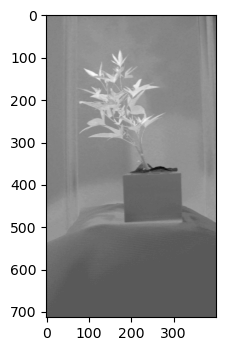

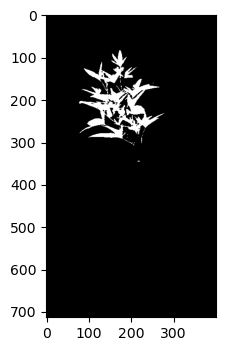

In [25]:
# Convert RGB to LAB and extract the blue channel ('b')

# Input:
#   rgb_img - RGB image data 
#   channel- Split by 'l' (lightness), 'a' (green-magenta), or 'b' (blue-yellow) channel
b = pcv.rgb2gray_lab(rgb_img=img, channel='b')

# Threshold the blue channel image 
b_thresh = pcv.threshold.binary(gray_img=b, threshold=160, max_value=255, 
                                object_type='light')




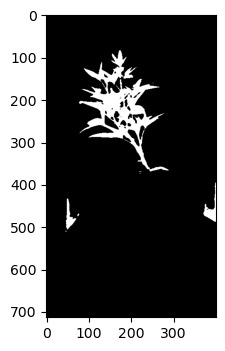

In [26]:
# Join the threshold saturation and blue-yellow images with a logical or operation 

# Inputs: 
#   bin_img1 - Binary image data to be compared to bin_img2
#   bin_img2 - Binary image data to be compared to bin_img1
bs = pcv.logical_or(bin_img1=s_mblur, bin_img2=b_thresh)

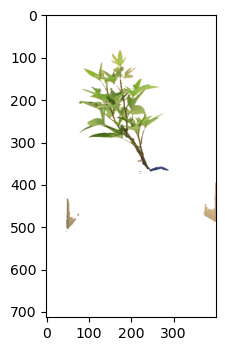

In [27]:
# Appy Mask (for VIS images, mask_color='white')

# Inputs:
#   img - RGB or grayscale image data 
#   mask - Binary mask image data 
#   mask_color - 'white' or 'black' 
masked = pcv.apply_mask(img=img, mask=bs, mask_color='white')